# Quickstart

## Predicting substructure mass with ssms

In this notebook we will predict the tower and monopile mass of an offshore wind turbine.



#### Imports

In [24]:
# Install hydesign if needed
import importlib
if not importlib.util.find_spec("ssms"):
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/basic-plugins/support-structure-mass-surrogate.git

In [13]:
import os
import pickle
import matplotlib.pyplot as plt

from ssms.models import model_path
from ssms.load_QLS import QLSModel, get_r2

#### Predict mass

Available initial power (scaled-from) surrogates:
IP: 10.0MW
IP: 15.0MW
IP: 3.4MW

Selected initial power:
IP: 15.0MW
output channel: tower_mass
[642458.07408856]
[642458.07408856 684316.37584743]


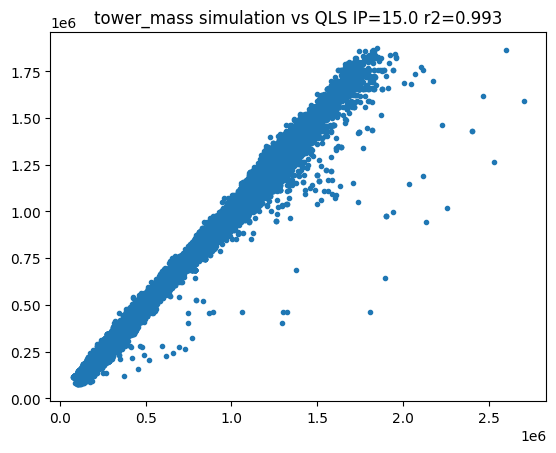

In [23]:
surrogate_path = os.path.join(model_path, 'QLS')
model_indicator = '_QLS_surrogate_model.pickle'

files = []
IPs = []
for file in os.listdir(surrogate_path):
    if model_indicator in file:
        IP = float(file.split(model_indicator)[0])
        files.append(file)
        IPs.append(IP)

print('Available initial power (scaled-from) surrogates:')
for ip in IPs:
    print(f'IP: {ip}MW')
print('')
print('Selected initial power:')
IP_item = 1
IP = IPs[IP_item]
print(f'IP: {IP}MW')
path = os.path.join(surrogate_path, files[IP_item])
with open(path, 'rb') as f:
    dic = pickle.load(f)

input_channel_names = dic['input_channel_names']
output_channel_names = dic['output_channel_names']
out_item = 1
output_channel = output_channel_names[out_item]
print(f'output channel: {output_channel}')
df = dic['df']

# plot simulated and predicted data
plt.figure()
r2 = get_r2(df[output_channel], df[output_channel+'_fit'])
plt.plot(df[output_channel], df[output_channel+'_fit'], '.')
plt.title(f'{output_channel} simulation vs QLS IP={IP} r2={r2:.3f}')

# predict 
qlsm = QLSModel(dic['models'][out_item], dic['input_scaler'], dic['output_scalers'][output_channel])
## float input
res = qlsm.predict(RP=11, D=214, HTrans=13, HHub_Ratio=0.7, WaterDepth=32, WaveHeight=3.5, WavePeriod=6, WindSpeed=9)
print(res)

## array-like input
res = qlsm.predict(RP=[11, 12], D=[214, 220], HTrans=[13, 14], HHub_Ratio=2*[0.7], WaterDepth=2*[32], WaveHeight=2*[3.5], WavePeriod=2*[6], WindSpeed=2*[9])
print(res)
